# <center>**CLEAN CLINICAL DATA**</center>

This notebook is designed to **clean the database**, and includes the following steps:

0.   Environment **configuration**.
1.   **Load** clinical database.
2.   **Check** variables: datatypes and values.
3.   Change **datatypes** when appropriate.
4.   Create **new variable**:
      - **Age**.
5.   Explore **labels** and create binary labels.
6.   Explore **variable values**.
7.   **Delete non-useful variables**.
8.   **Save** the cleaned and cured database.

## **CLEAN CLINICAL DATA**

In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### **0. Environment configuration.**

#### Set the working directory

In [2]:
# Set working directory
wd = '/Users/pablomenendezfernandez-miranda/Proyecto Otosclerosis/'
os.chdir(wd)

print(f'Directorio actual: {os.getcwd()}')

# Check directory files
print(f'Directory files: {os.listdir(wd)}')

Directorio actual: /Users/pablomenendezfernandez-miranda/Proyecto Otosclerosis
Directory files: ['Tables', 'Databases', 'Episodes', 'Figures', 'Notebooks']


#### Mount Drive (if executed on Google Colab)

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

### **1. Load clinical_data dataframe**

In [4]:
# Load pandas dataframe
clinical_data_dir= 'Databases/1_Otosclerosis_clinical_data.xlsx'
df_clinical= pd.read_excel(clinical_data_dir, engine='openpyxl', na_values='nan')

print(df_clinical.shape)
df_clinical.head(0)

(127, 66)


,EPI_CODE,NHC,Birth_date,Sex,Pathological_Ear,Otoscopy_Pathological_Ear,0toscopy_Findings_Pathological_Ear,Stapedial_reflex,Rinne,Weber,...,Pre_surgical_Verbal_Audiometry_Pathological_Ear_%,Pre_surgical_Max_Verbal_Audiometry_Pathological_Ear_dB,Post_surgical_Hearing_Assessment,Post_surgical_One_Week_Mean_Hearing_impairment_dB,Post_surgical_One_Month_Mean_Hearing_impairment_dB,Post_surgical_One_Year_Mean_Hearing_impairment_dB,Surgical_Findings_Chorda_Timpany_Damage,Post_surgical_corticoid_treatment,Label,Download_Temporal_Bone_CT_scan


### **2. Check variables: datatypes and values**

In [5]:
print(f'Number of columns: {df_clinical.shape[1]}\n')
print(df_clinical.dtypes.to_string())

Number of columns: 66

EPI_CODE                                                                     object
NHC                                                                           int64
Birth_date                                                           datetime64[ns]
Sex                                                                          object
Pathological_Ear                                                             object
Otoscopy_Pathological_Ear                                                    object
0toscopy_Findings_Pathological_Ear                                           object
Stapedial_reflex                                                             object
Rinne                                                                        object
Weber                                                                        object
Tympanogram_Pathological_Ear                                                 object
Pre_surgical_Tonal_Audiometry_Pathological_Ear       

### **3. Change datatypes when appropriate**

In [6]:
# Define the appropriate datatypes

int_=  ['NHC',                                'Sensorineural_impairment_dB_250Hz',  'Sensorineural_impairment_dB_500Hz',  'Sensorineural_impairment_dB_1000Hz', 'Sensorineural_impairment_dB_2000Hz',
        'Sensorineural_impairment_dB_3000Hz', 'Sensorineural_impairment_dB_4000Hz', 'Conductive_impairment_dB_250Hz',     'Conductive_impairment_dB_500Hz',     'Pre_surgical_Verbal_Audiometry_Pathological_Ear_dB',
        'Conductive_impairment_dB_1000Hz',    'Conductive_impairment_dB_2000Hz',    'Conductive_impairment_dB_3000Hz',    'Conductive_impairment_dB_4000Hz',    'Conductive_impairment_dB_6000Hz',
        'Pre_surgical_Verbal_Audiometry_Pathological_Ear_%',        'Pre_surgical_Max_Verbal_Audiometry_Pathological_Ear_dB',
        'Post_surgical_One_Week_Mean_Hearing_impairment_dB',  'Post_surgical_One_Month_Mean_Hearing_impairment_dB',       'Post_surgical_One_Year_Mean_Hearing_impairment_dB']

str_=  ['EPI_CODE', 'Comments', 'Download_Temporal_Bone_CT_scan']

cat_=  ['Sex',                         'Pathological_Ear',                                         'Otoscopy_Pathological_Ear',                          '0toscopy_Findings_Pathological_Ear',                        'Stapedial_reflex',
        'Rinne',                       'Weber',                                                    'Tympanogram_Pathological_Ear',                       'Pre_surgical_Tonal_Audiometry_Pathological_Ear',            'Hearing_impairment_Pathological_Ear',
        'Carhart_notch',               'Tonal_Audiometry_Contralateral_Ear',                       'Hearing_impairment_Contralateral_Ear',               'Temporal_Bone_CT_scan_Findings_Pathological_Ear',           'Temporal_Bone_CT_scan_Otosclerosis_Contralateral_Ear',
        'Temporal_Bone_CT_scan_Superior_Canal_Dehiscence_Contralateral_Ear',                       'Temporal_Bone_CT_scan_Enlarged_Vestibular_Aqueduct', 'Temporal_Bone_CT_scan_Other_Findings',                      'Surgeon',
        'Surgical_Treatment',          'Surgical_Findings_Floating_Stapes_Footplate',              'Surgical_Findings_Incus_Erosion',                    'Surgical_Findings_Ossicular_Chain_Dislocation',             'Surgical_Findings_Other_Findings',
        'Post_surgical_Vertigo',       'One_Week_Post_surgical_Tonal_Audiometry_Pathological_Ear', 'Hearing_impairment_One_Week_Post_surgical',          'One_Month_Post_surgical_Tonal_Audiometry_Pathological_Ear', 'Hearing_impairment_One_Month_Post_surgical',
        'One_Year_Post_surgical_Tonal_Audiometry_Pathological_Ear',                                'Hearing_impairment_One_Year_Post_surgical',          'Otosclerosis_Contralateral_Ear',                            'Post_surgical_Hearing_Assessment',
        'Surgical_Findings_Chorda_Timpany_Damage',                                                 'Post_surgical_corticoid_treatment',                  'Label']

date_= ['Birth_date', 'Pre_surgical_Tonal_Audiometry_Pathological_Ear_Date', 'Temporal_Bone_CT_scan_Date', 'Surgery_Date',
        'One_Week_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear',     'One_Month_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear',
        'One_Year_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear']


print(f'Ints: {len(int_)}')
print(f'Strs: {len(str_)}')
print(f'Cats: {len(cat_)}')
print(f'Dates: {len(date_)}')

print(f'--------- \nTotal: {len(int_) + len(str_) + len(cat_) + len(date_)}')

# Check that all columns are included in the datatype lists
print(f'\nOther columns: {list(set(df_clinical.columns.to_list()) - set(int_ + str_ + cat_ + date_))}')

Ints: 20
Strs: 3
Cats: 36
Dates: 7
--------- 
Total: 66

Other columns: []


In [7]:
# Change datatypes
df_clinical[int_]= df_clinical[int_].astype('float') # tiene nan int
df_clinical[str_]= df_clinical[str_].astype('string')
df_clinical[cat_]= df_clinical[cat_].astype('category')
df_clinical[date_]= df_clinical[date_].astype('string').astype('datetime64[ns]')

In [8]:
# Check new datatypes
print(f'Number of columns: {df_clinical.shape[1]}\n')
print(df_clinical.dtypes.to_string())

Number of columns: 66

EPI_CODE                                                             string[python]
NHC                                                                         float64
Birth_date                                                           datetime64[ns]
Sex                                                                        category
Pathological_Ear                                                           category
Otoscopy_Pathological_Ear                                                  category
0toscopy_Findings_Pathological_Ear                                         category
Stapedial_reflex                                                           category
Rinne                                                                      category
Weber                                                                      category
Tympanogram_Pathological_Ear                                               category
Pre_surgical_Tonal_Audiometry_Pathological_Ear       

### **4. Create new variable: age**

In [9]:
# Create new variable age
def age (df, CT_scan_date, birth_date):

  df2= df.copy()
  b_year, b_month, b_day= df2[birth_date].dt.year,   df2[birth_date].dt.month,   df2[birth_date].dt.day
  C_year, C_month, C_day= df2[CT_scan_date].dt.year, df2[CT_scan_date].dt.month, df2[CT_scan_date].dt.day

  df2['age']= (C_year - b_year)
  df2['age'] -= ( (C_month < b_month) | ((C_month == b_month) & (C_day < b_day)) )

  return df2['age'].astype('float64')

In [10]:
df_clinical['age']= age (df_clinical, 'Temporal_Bone_CT_scan_Date', 'Birth_date')

### **5. Explore labels and create binary labels**

In [11]:
# Explore labels
df_clinical['Label_extended']= df_clinical['Label']
pd.DataFrame(df_clinical['Label_extended'].value_counts())

,count
Label_extended,
Otosclerosis,53
Normal,40
Normal_ContraOS,17
NoTC_Otosclerosis,12
Necrosis de rama larga del yunque,3
Falta de desarrollo del ligamento platinar,1
Malformación estribo,1


In [12]:
# Dicotomize labels: Otosclerosis vs Normal
normal_values = ['Normal_ContraOS', 'Necrosis de rama larga del yunque', 'Falta de desarrollo del ligamento platinar', 'Malformación estribo']

# Change values
df_clinical.loc[df_clinical['Label'].isin (normal_values), 'Label'] = 'Normal'
df_clinical.loc[df_clinical['Label'] == 'NoTC_Otosclerosis', 'Label'] = 'Otosclerosis' # NoTC_Otosclerosis = normal CT and otosclerosis

# Remove empty categories
df_clinical['Label'] = df_clinical['Label'].cat.remove_unused_categories()

# Print results
df_clinical['Label'].value_counts()
pd.DataFrame(df_clinical['Label'].value_counts())

,count
Label,
Otosclerosis,65
Normal,62


### **6. Explore variable values**

In [13]:
quantitatives=     list(df_clinical.dtypes[df_clinical.dtypes == 'float64'].index)
qualitatives=      list(df_clinical.dtypes[df_clinical.dtypes == 'category'].index)
qualitatives_str=  list(df_clinical.dtypes[df_clinical.dtypes == 'string[python]'].index)
dates=             list(df_clinical.dtypes[df_clinical.dtypes == 'datetime64[ns]'].index)

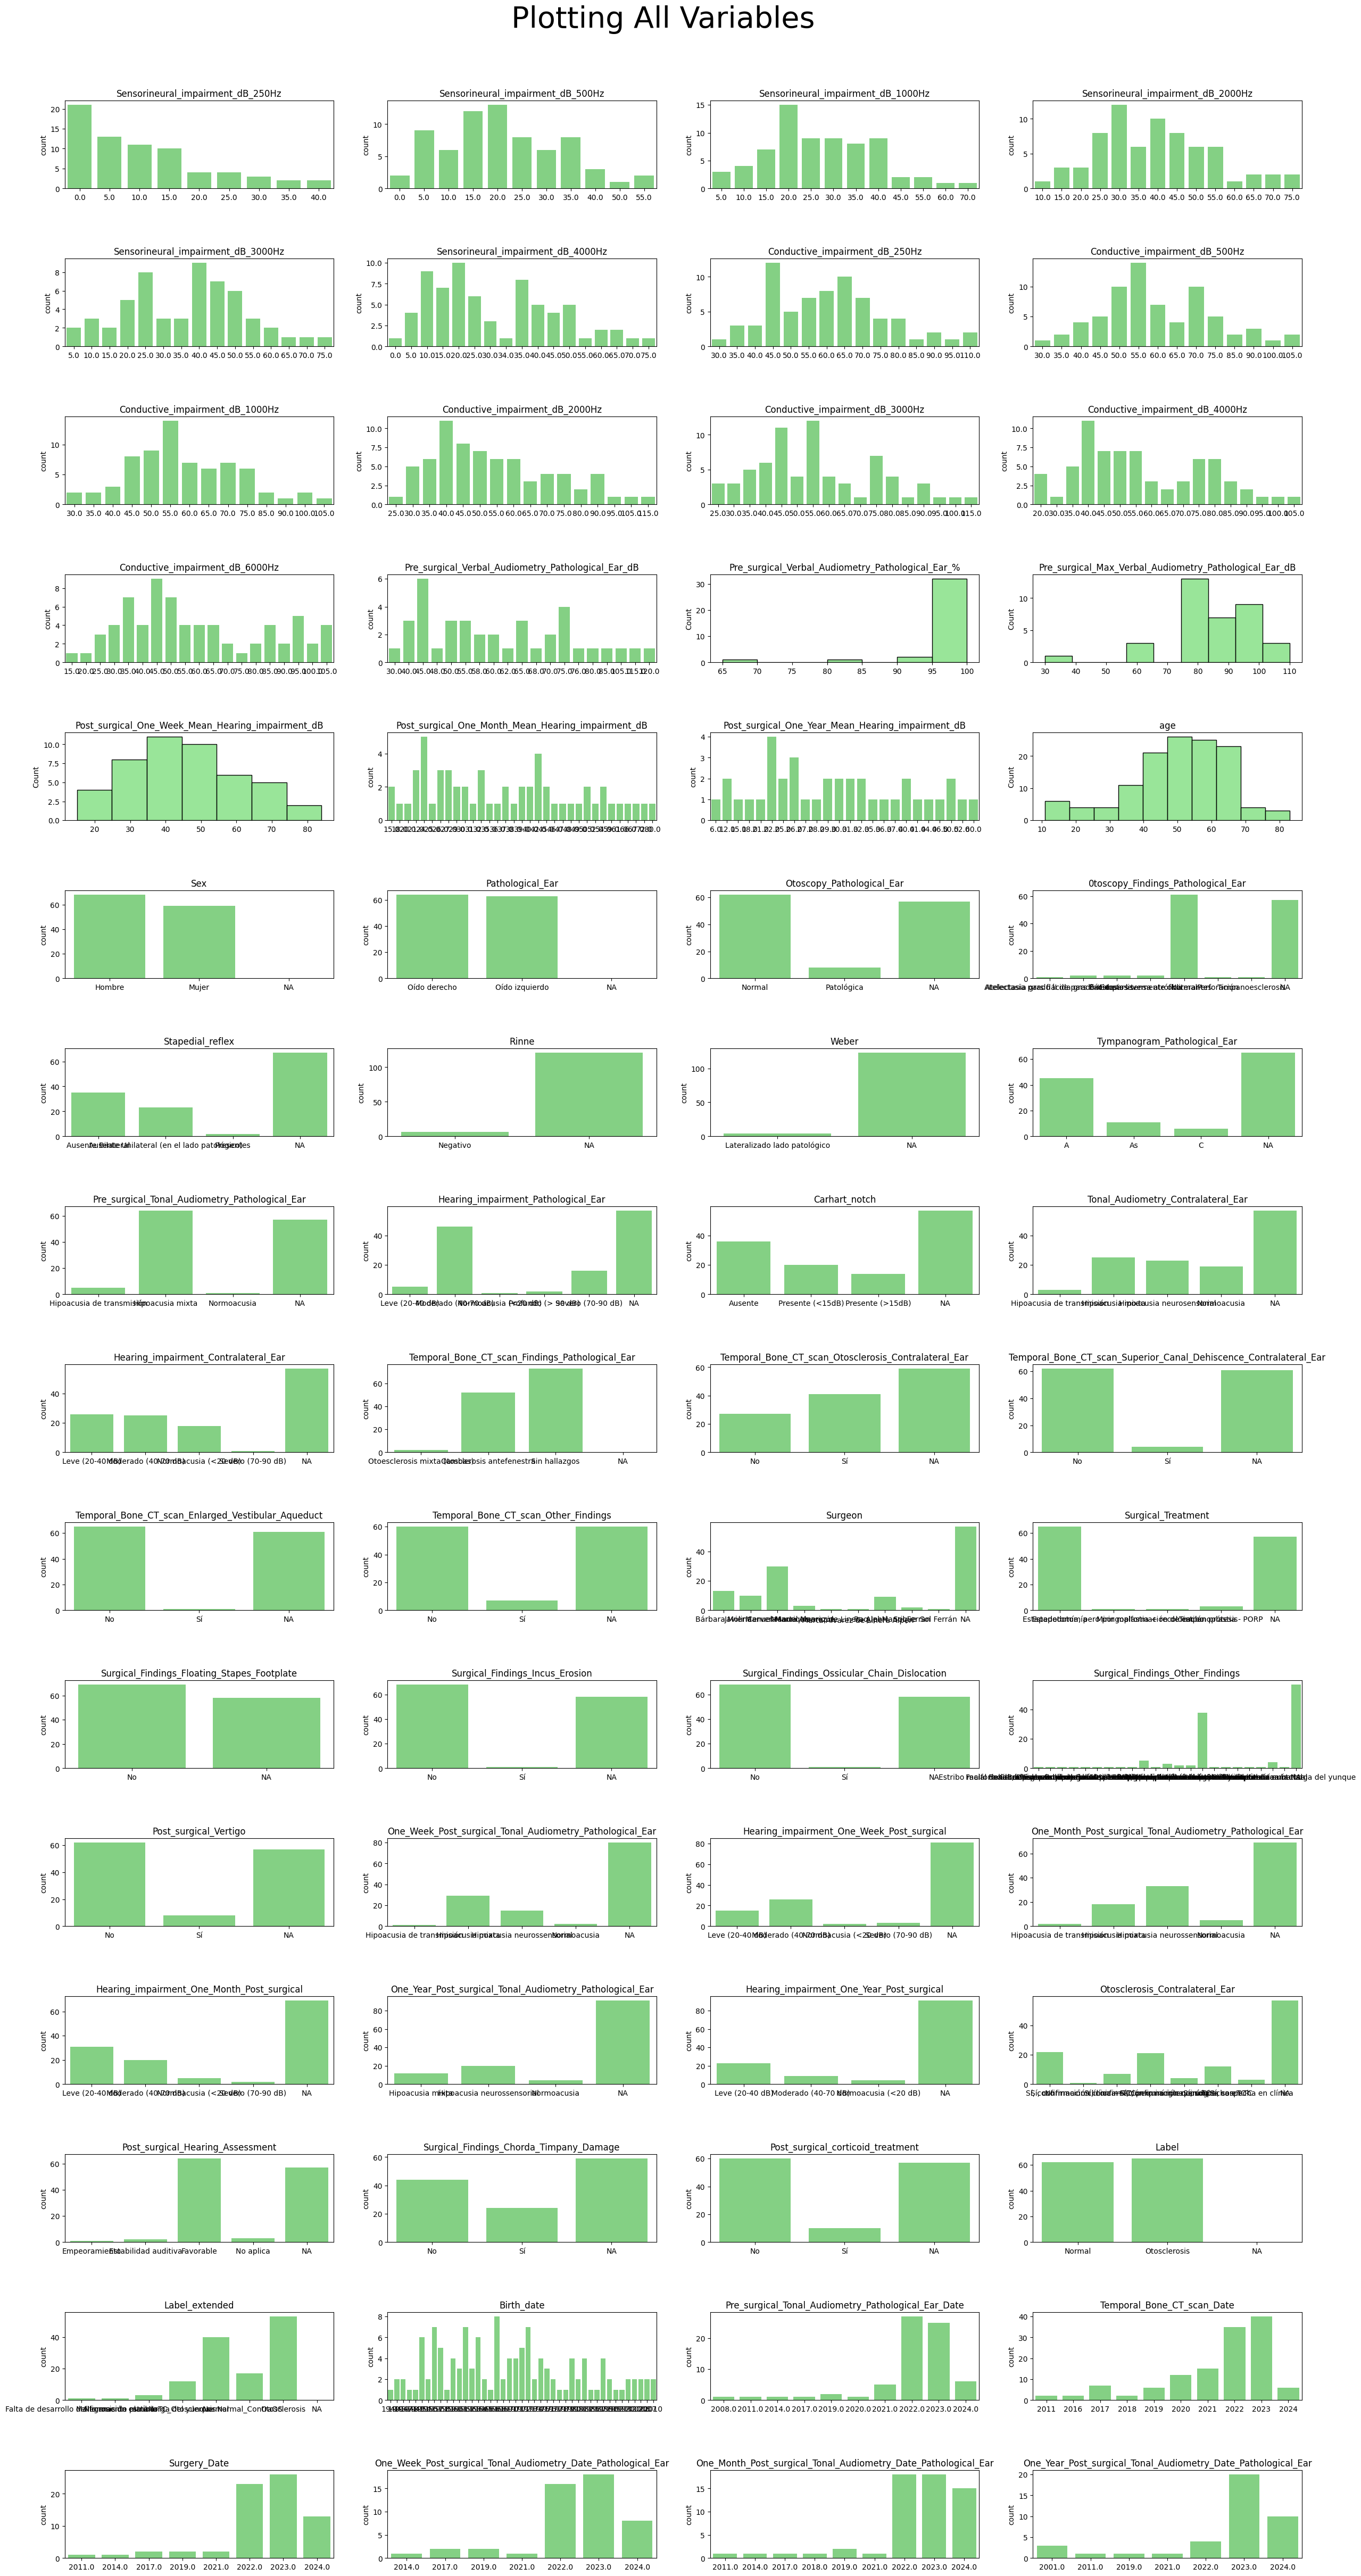

In [14]:
# Plotting Variables
vars= quantitatives [1:] + qualitatives + dates # Exclude NHC
hists= ['Pre_surgical_Verbal_Audiometry_Pathological_Ear_%',    'Pre_surgical_Max_Verbal_Audiometry_Pathological_Ear_dB',
        'Post_surgical_One_Week_Mean_Hearing_impairment_dB',    'age', 'auc_gap']

df2= df_clinical.copy()

ncols= 4
nrows= len(vars) // ncols
if len(vars) % ncols > 0: nrows+=1

fig2, axs= plt.subplots(nrows, ncols, figsize=(30,60))
fig2.suptitle('Plotting All Variables', fontsize=40, y=0.91)
idx= 0

for i in range (nrows): # Rows
    for j in range (ncols): # Columns

      if idx < len(vars):
        # If variable is continue, histplot is appropriate
        if vars[idx] in hists:
          sns.histplot(data=df2, x=vars[idx], color='#77DD77', ax=axs[i,j])

        # If variable is a category, add NA category
        elif str(df2[vars[idx]].dtypes) == 'category':
          df2[vars[idx]]= df2[vars[idx]].cat.add_categories('NA').fillna('NA')
          sns.countplot(data=df2, x=vars[idx], color='#77DD77', ax=axs[i,j])

        # If variable is a datetime, plot only the year
        elif str(df2[vars[idx]].dtypes) == 'datetime64[ns]':
          df2[vars[idx]]= df2[vars[idx]].dt.year
          sns.countplot(data=df2, x=vars[idx], color='#77DD77', ax=axs[i,j])

        # If variable is discrete, countplot
        else:
          sns.countplot(data=df2, x=vars[idx], color='#77DD77', ax=axs[i,j])

        axs[i,j].set_title(vars[idx])
        axs[i,j].set_xlabel('')
        idx+=1

      elif idx >= len(vars):
        break

plt.subplots_adjust(wspace=0.2, hspace=0.8)

### **7. Delete non-useful variables**

In [15]:
# Remove non-useful variables
non_useful= ['NHC', 'Pre_surgical_Verbal_Audiometry_Pathological_Ear_dB', 'Conductive_impairment_dB_6000Hz',
             'Pre_surgical_Verbal_Audiometry_Pathological_Ear_%',         'Pre_surgical_Max_Verbal_Audiometry_Pathological_Ear_dB',
             'Post_surgical_One_Week_Mean_Hearing_impairment_dB',         'Post_surgical_One_Year_Mean_Hearing_impairment_dB',
             'Comments', 'Download_Temporal_Bone_CT_scan',                'Otoscopy_Pathological_Ear',
             '0toscopy_Findings_Pathological_Ear',                        'Stapedial_reflex','Rinne',
             'Weber', 'Birth_date',                                       'Tympanogram_Pathological_Ear',
             'Pre_surgical_Tonal_Audiometry_Pathological_Ear',            'Tonal_Audiometry_Contralateral_Ear',
             'Hearing_impairment_Contralateral_Ear',                      'Temporal_Bone_CT_scan_Otosclerosis_Contralateral_Ear',
             'Temporal_Bone_CT_scan_Superior_Canal_Dehiscence_Contralateral_Ear',  'Temporal_Bone_CT_scan_Enlarged_Vestibular_Aqueduct',
             'Temporal_Bone_CT_scan_Other_Findings',                      'Surgical_Findings_Floating_Stapes_Footplate',
             'Surgical_Findings_Incus_Erosion',                           'Surgical_Findings_Ossicular_Chain_Dislocation',
             'Surgical_Findings_Other_Findings',                          'One_Year_Post_surgical_Tonal_Audiometry_Pathological_Ear',
             'Hearing_impairment_One_Year_Post_surgical',                 'Post_surgical_Hearing_Assessment',
             'Surgical_Findings_Chorda_Timpany_Damage',                   'Post_surgical_corticoid_treatment',
             'Pre_surgical_Tonal_Audiometry_Pathological_Ear_Date',       'Temporal_Bone_CT_scan_Date',
             'Surgery_Date',                                              'One_Week_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear',
             'One_Month_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear', 'Post_surgical_One_Month_Mean_Hearing_impairment_dB',
             'One_Year_Post_surgical_Tonal_Audiometry_Date_Pathological_Ear']

In [16]:
# Remove non-useful variables
df_clinical_cleaned= df_clinical.drop(non_useful, axis=1)

print(f'{df_clinical_cleaned.shape}\n')
df_clinical_cleaned.head(4)

(127, 29)



,EPI_CODE,Sex,Pathological_Ear,Hearing_impairment_Pathological_Ear,Sensorineural_impairment_dB_250Hz,Sensorineural_impairment_dB_500Hz,Sensorineural_impairment_dB_1000Hz,Sensorineural_impairment_dB_2000Hz,Sensorineural_impairment_dB_3000Hz,Sensorineural_impairment_dB_4000Hz,...,Surgical_Treatment,Post_surgical_Vertigo,One_Week_Post_surgical_Tonal_Audiometry_Pathological_Ear,Hearing_impairment_One_Week_Post_surgical,One_Month_Post_surgical_Tonal_Audiometry_Pathological_Ear,Hearing_impairment_One_Month_Post_surgical,Otosclerosis_Contralateral_Ear,Label,age,Label_extended
0,EPI_0001,Hombre,Oído izquierdo,Moderado (40-70 dB),25.0,35.0,35.0,45.0,35.0,15.0,...,Estapedotomía,No,Hipoacusia mixta,Moderado (40-70 dB),Hipoacusia neurossensorial,Leve (20-40 dB),No,Otosclerosis,39.0,NoTC_Otosclerosis
1,EPI_0002,Mujer,Oído izquierdo,Moderado (40-70 dB),0.0,10.0,20.0,30.0,10.0,5.0,...,Estapedotomía,No,Hipoacusia mixta,Leve (20-40 dB),Hipoacusia mixta,Leve (20-40 dB),"Sí, confirmación quirúrgica con TC+",Otosclerosis,45.0,Otosclerosis
2,EPI_0003,Mujer,Oído derecho,Moderado (40-70 dB),35.0,35.0,25.0,60.0,55.0,50.0,...,Estapedotomía,No,Hipoacusia mixta,Moderado (40-70 dB),Hipoacusia mixta,Moderado (40-70 dB),"Sí, confirmación quirúrgica con TC+",Otosclerosis,65.0,Otosclerosis
3,EPI_0004,Hombre,Oído derecho,Moderado (40-70 dB),0.0,5.0,20.0,30.0,20.0,20.0,...,Estapedotomía,No,NaN,NaN,Hipoacusia neurossensorial,Leve (20-40 dB),"Sí, sospecha en TC",Otosclerosis,44.0,Otosclerosis


In [17]:
df_clinical_cleaned.columns.to_list()

['EPI_CODE',
 'Sex',
 'Pathological_Ear',
 'Hearing_impairment_Pathological_Ear',
 'Sensorineural_impairment_dB_250Hz',
 'Sensorineural_impairment_dB_500Hz',
 'Sensorineural_impairment_dB_1000Hz',
 'Sensorineural_impairment_dB_2000Hz',
 'Sensorineural_impairment_dB_3000Hz',
 'Sensorineural_impairment_dB_4000Hz',
 'Carhart_notch',
 'Conductive_impairment_dB_250Hz',
 'Conductive_impairment_dB_500Hz',
 'Conductive_impairment_dB_1000Hz',
 'Conductive_impairment_dB_2000Hz',
 'Conductive_impairment_dB_3000Hz',
 'Conductive_impairment_dB_4000Hz',
 'Temporal_Bone_CT_scan_Findings_Pathological_Ear',
 'Surgeon',
 'Surgical_Treatment',
 'Post_surgical_Vertigo',
 'One_Week_Post_surgical_Tonal_Audiometry_Pathological_Ear',
 'Hearing_impairment_One_Week_Post_surgical',
 'One_Month_Post_surgical_Tonal_Audiometry_Pathological_Ear',
 'Hearing_impairment_One_Month_Post_surgical',
 'Otosclerosis_Contralateral_Ear',
 'Label',
 'age',
 'Label_extended']

### **8. Save the cleaned and cured database**

In [18]:
# Save data
save_path= 'Databases/'

df_clinical_cleaned.to_excel(save_path + '2_df_clinical_data_cleaned.xlsx')
df_clinical_cleaned.to_csv(save_path + '2_df_clinical_data_cleaned.csv')
df_clinical_cleaned.to_feather(save_path + '2_df_clinical_data_cleaned.feather')